<h1><center>  lab 6: Social Network Analysis </center>
    
<img src="https://files.realpython.com/media/Python-AI-How-to-Build-Your-First-Neural-Network_Watermarked.68fe2ddda7ae.jpg" width="500">


```Created by Jinnie Shin (jinnie.shin@coe.ufl.edu)```\
```Date: June 2nd 2022```

```Image source: https://realpython.com/python-encodings-guide/g```



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left"> 

 ### Required Packages or Dependencies

In [5]:
#!pip install { } ! in case you run into the `package not avaialble` error
import numpy as np
import pandas as pd
import networkx as nx

# 1. Social Network Analysis 
<img src="https://miro.medium.com/max/1400/1*gaSIh_PKp8RuM0NXTT-QSA.png" width="700">

### Practice 1: Let's first create a adjacency matrix to create a network using `from_numpy_matrix()`

[(0, 0), (0, 1), (1, 1)]


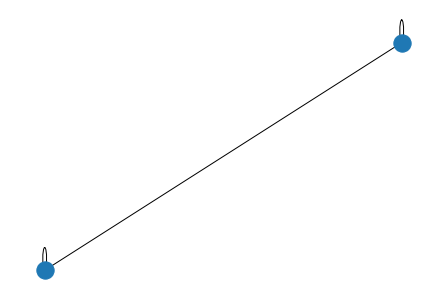

In [6]:
A = np.array([[1, 1], [2, 1]])
G = nx.from_numpy_matrix(A)

print(G.edges())
nx.draw(G)

### Practice 2: Let's add nodes and edges using `add_edges()` and `add_nodes()`

|  Object Type |              Networkx         |
|:------------|:---------------------------------|
| Undirected graph G | `G = nx.Graph()`|
| Directed graph G | `G = nx.DiGraph()`|

### Let's add the nodes first

In [7]:

G = nx.Graph() # first we will define an empty undirected graph

#G.add_node(1) # add one node at a time 

#G.add_nodes_from([2,3, 4, 5]) # add a list of nodes 

#nx.draw_spring(G) # draw the nextwork with a spring layout 

#nx.draw_spring(G, with_labels= True)

#G.nodes() # if you wanted to print out the nodes

### Let's add the edges now

EdgeView([(2, 3), (2, 1), (3, 1), (4, 5)])

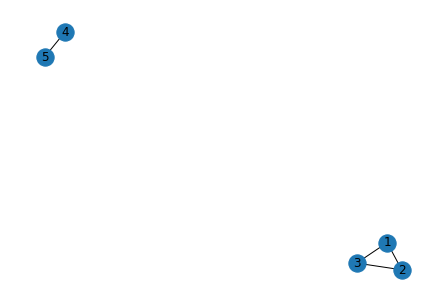

In [8]:

G.add_edge(2, 3) # add an edge between the nodes 2 and 3

G.add_edges_from([(1, 2), (1, 3), (4, 5)]) # add a list of edges 

nx.draw_spring(G, with_labels= True)

np.asarray(nx.adjacency_matrix(G))

G.edges() # if you wanted to print out the edges

<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">


### Task 1: Create a undirected graph using `networkx`

> **Q1:** Your task is to create a following network `H` either using an **adjaceny matrix**, or by manually adding the edges and nodes.  

<img src="https://i.stack.imgur.com/0AyxF.png" width="700">


In [ ]:
############ your code here ################


H= 






#############################################

> **Q2:** Compute the following nextwork statistics 
>> - The degree centrality using `nx.degree_centrality(H)`
>> - The closeness centrality using `nx.closeness_centrality(H)`
>> - The betweeness centarlity using `nx.betweeness_centarlity(H)`
>> - Eigenvector centrality using `nx.eigenvector_centrality(H)`

More indices available: https://networkx.org/documentation/stable/reference/algorithms/centrality.html

In [ ]:
############ your code here ################








#############################################

> Q3: Let's visualize the network using `nx.draw()`

In [ ]:
############ your code here ################






#############################################

#  2. Advanced Algorithms in SNA 
- ###  HITS (Hyperlink Induced Topic Search)
> The algorithm is used to the web link-structures to discover and rank the webpages relevant for a particular search. HITS uses **hubs** and **authorities** to define a recursive relationship between webpages. 
> - Authority: A node is high-quality if many high-quality nodes link to it
> - Hub: A node is high-quality if it links to many high-quality nodes

- #### Algorithm Steps
1. Initialize the hub and authority of each node with a value of 1
2. For each iteration, update the hub and authority of every node in the graph
3. The new authority is the sum of the hub of its parents
4. The new hub is the sum of the authority of its children
5. Normalize the new authority and hub

- #### Zachary’s Karate Club graph Data (from networkx)

> Each node in the returned graph has a node attribute 'club' that indicates the name of the club to which the member represented by that node belongs, either `Mr. Hi` or `Officer`.

In [14]:

ex =  nx.karate_club_graph()

# Let's take a look at how many nodes/edges we have in this data `ex`


# Let's visualize the network 



# Let's look at the metadata 
#G.node[5]['club']


In [17]:
# Let's extract the adjacency matrix

A = nx.convert_matrix.to_numpy_matrix(ex)


<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

 ## Task 2: Identifying Hubs and Authorities 
 > **STEP 1**: Apply the HITS algorithm using `hubs, authorities = nx.hits(ex, normalized = True)`\
 > **STEP 2**: Print hub and authories

In [16]:
#Let's apply the HITS algorithm 





#  3. Social Network Analysis and Educational Assessments
## 1. Community Detection 
> In this task, we will try to find a "natural" social communities that occur during the problem-solving assessment. Students could interact with each other to get / provide help. 
<img src="https://miro.medium.com/proxy/1*fVGpU47jjKRVKdiYqeODkw.png" width="400">


> Potential questions we may need to ask/answer:
>> - RQ1: Do students in the same communitiy share similar problem solving strategies?
>> - RQ2: Does the community associate with students' problem-solving abilities?
>> - So many more!!
 
### 1.1 Let's import the dataset

In [18]:
G = nx.read_edgelist("./week4_data/data.txt",nodetype=int,data=False,create_using=nx.Graph)

# let's see how many students we have in this network 



# let's see how many interactions we caputered 



The **Girvan-Newmann algorithm** tries to separate a network into communities (see: https://en.wikipedia.org/wiki/Girvan–Newman_algorithm)
- by cutting these edges with high betweenness centrality
- calculates edge betweenness centrality for every edge and then removes the one with the highest score 
- repeated until the desired number of communities is identified

### 1.2 Let's visualize the original network first

In [ ]:
### Let's explore!





In [224]:
from pyvis.network import Network # we will use this python visualizer `pyvis`. !pip install pyvis 
 
g=Network(height=800, width=800, notebook=True, font_color="black") # here 'g' represents the network generator
g.toggle_hide_edges_on_drag(True)

g.from_nx(G)
g.show_buttons(filter_=True)

g.show('Student_network_original.html') #this should be in your folder now 

### 1.3 Let's apply the Girvan–Newman algorithm for community detection

In [225]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)

#communities = tuple(sorted(c) for c in next(communities_generator))

In [71]:
### Let's explore!



### 1.4 Let's apply the k clique algorithm for community detection

<img src="https://www.researchgate.net/profile/Yuhua-Li-14/publication/241047149/figure/fig2/AS:669133683306496@1536545310002/K-cliques-and-k-clique-clusters.png" width="600">

> **a k-clique** is a relaxed clique, i.e., a k-clique is a quasi-complete sub-graph. A k-clique in a graph is a sub-graph where the distance between any two vertices is no greater than k\
> Image Source: https://www.researchgate.net/profile/Yuhua-Li-14/publication/241047149/figure/fig2/AS:669133683306496@1536545310002/K-cliques-and-k-clique-clusters.png

In [108]:
from networkx.algorithms.community import k_clique_communities

communities_2 = [list(i) for i in k_clique_communities(G, 4)]
      
                     
        

#### Create a dictionary that saves the decision 

In [103]:
communities_2_dict ={}
k = 0
for i in communities_2:
    for j in i:
        communities_2_dict[j] = k
    k+=1

#### Visualize the network 

In [104]:
# define a list of 95 different colors
# generated with the site: iwanthue (https://medialab.github.io/iwanthue/)
color_list = ["#0157a1", "#77f431", "#000cb3", "#e4ff3f",
"#6213c6", "#1abd00", "#ab39eb", "#00c932", "#e232e8",
"#2a9b00", "#975bff", "#aecf00", "#01119c", "#ffe02b",
"#5565ff", "#c1ff73", "#a5009f", "#00ca5f", "#ff64e7",
"#43ffa5", "#f60095", "#76ffa5", "#ff50c9", "#a0ffa4",
"#3a0067", "#f6ff7f", "#00216e", "#e5bc00", "#e378ff",
"#aab000", "#828bff", "#ff7910", "#0281e2", "#e08900",
"#019def", "#ff3f2b", "#01e0d3", "#da0120", "#03bde6",
"#d04b00", "#819cff", "#648e00", "#ff46ad", "#018436",
"#b40078", "#01a165", "#ca0067", "#3d7900", "#640063",
"#f2ffa5", "#16003e", "#f3ffbe", "#0f002d", "#ffd580",
"#000c26", "#ff6b47", "#01ad92", "#ff5552", "#85e2ff",
"#b5002d", "#b4ffec", "#8e0023", "#e4ffe9", "#82004f",
"#667000", "#feaaff", "#284f00", "#b8a8ff", "#8d6d00",
"#8dbfff", "#724200", "#0174ae", "#ff4f70", "#00512a",
"#ff9acb", "#0f2a00", "#ffedfe", "#000a05", "#f9fffd",
"#280e00", "#c9f1ff", "#6b001f", "#e3d2ff", "#571800",
"#ffdec2", "#003361", "#ff8a77", "#00353c", "#ff839a",
"#018093", "#ffb094", "#00506d", "#ffbeb9", "#371400",
"#342c00"]

color_list = color_list[0:len(communities_2)]
color_dict = pd.Series(color_list, index=np.arange(0,len(communities_2))).to_dict()
for key, value in communities_2_dict.items():
    communities_2_dict[key] = color_dict[value]

nx.set_node_attributes(G, communities_2_dict, 'color')

g=Network(height=800, width=800, notebook=True, font_color="black") # here 'g' represents the network generator
g.toggle_hide_edges_on_drag(True)
g.barnes_hut()
g.from_nx(G)
g.show_buttons(filter_=True)

g.show('Student_network_original.html') #this should be in your folder now 



## 2. Problem solving process modelling 
- US Public use data (PIAAC - US Public Use Files (PUF) 2012.csv) 
- export_raw_log_for_all_items_all_variables.txt

> Booklet Info: https://piaac-logdata.tba-hosting.de/additionalinformation.html \
> General event type description: https://piaac-logdata.tba-hosting.de/additionalinformation.html \
> Code book: https://docs.google.com/spreadsheets/d/1OJwlib4qiWpCgn35tHgbKhG0qX5-76Vd/edit?usp=drive_web&ouid=111988984904105753234&rtpof=true

#### Import the data 

In [2]:
import pandas as pd

# this is to import and generate a dataframe using the process data 

dir_ = './week4_data/' # your directory 

dat = pd.read_csv(dir_+'export_raw_log_for_all_items_all_variables copy.tsv', sep='\t')   
dat['Student_id'] = dat.CNTRYID + '_' + dat.SEQID.astype(str )
dat = dat.set_index('Student_id')

dat2 = pd.read_csv(dir_+'PIAAC - US Public Use Files (PUF) 2012.csv')

FileNotFoundError: [Errno 2] No such file or directory: './week4_data/export_raw_log_for_all_items_all_variables copy.tsv'

#### Necessary functions to preprocess the data

In [214]:
def item_score(x):
    try: 
        x= [i for i in x if 'result=' in i]
        x = x[0].replace('result="true"', '1')
        x = x.replace('result="false"', '0')
        return x 
    except:
        None

def item_name(x):
    try: 
        x = [i for i in x if 'name=' in i]
        x = x[0].split('=')[1].replace('"', '')
        return x
    except:
        None

def data_import(dat, dat2):
    temp = dat[dat.event_type =='ItemScore']['event_description'].apply(lambda x: x.split(' '))
    score= temp.apply( item_score)
    name = temp.apply(item_name)
    data = pd.concat([score, name], axis=1)
    data.columns = ['score', 'item_number']
    data = data.reset_index()

    # this is the final public use data = dat2[dat2.SEQID.isin(dat.SEQID.tolist())]
    dat2 = dat2[dat2.SEQID.isin(dat.SEQID.tolist())]
    pbs = [i for i in dat2.columns if 'U' ==i[0]]
    dat2_pbs = dat2[['SEQID']+pbs] # Let's drop any column that has no participation

    dat_pbs = dat[dat.booklet_id.isin(['PS1', 'PS2'])]
    dat2_pbs = dat2_pbs[dat2_pbs.SEQID.isin(dat_pbs.SEQID.tolist())]
    
    dat2_pbs = dat2_pbs.set_index('SEQID')
    return dat_pbs, dat2_pbs 

dat_pbs, dat2_pbs = data_import(dat, dat2)
booklet_assign = pd.DataFrame(dat_pbs.groupby('SEQID')['booklet_id'].apply(set))

#### visualize participants' item solving process 

In [3]:

def visualize_action(SEQID =10, item=1, book='PS1'):
    import networkx as nx
    G = nx.DiGraph()
    ex_actions = dat_pbs[(dat_pbs.SEQID == SEQID) & (dat_pbs.item_id ==item) & (dat_pbs.booklet_id == book)][['event_type', 'timestamp']]
    time = ex_actions['timestamp'].diff().fillna(0)
    
    edges = []
    for i in range(len(ex_actions['event_type'].tolist())):
        try:
            temp = (ex_actions['event_type'].tolist()[i], ex_actions['event_type'].tolist()[i+1])
            edges.append(temp)
        except: 
            None
    import networkx as nx 
    #G=nx.from_edgelist(edges)
    from collections import Counter
    weight_dic = dict(Counter(edges))
    G = nx.Graph()
    G.add_nodes_from(ex_actions['event_type'].tolist())
    for i, j in zip(edges, time.tolist()):
        G.add_edge(i[0], i[1], weight=weight_dic[(i[0], i[1])] )
    G.add_node('START',size=15, group=2)
    return G 

G= visualize_action(SEQID=10, item=1, book='PS1') # this is your controller 

from pyvis.network import Network
g=Network(height=800, width=800, notebook=True, font_color="black")
g.toggle_hide_edges_on_drag(True)
#g.barnes_hut()
g.from_nx(G)
g.show_buttons(filter_=True)
g.show('item_solving_steps.html')



### TASK 1: Aggergate the actions 

In [52]:

def visualize_action(item=1, book='PS1'):
    import networkx as nx
    G = nx.DiGraph()
    ex_actions = dat_pbs[(dat_pbs.item_id ==item) & (dat_pbs.booklet_id == book)][['event_type', 'timestamp']]
    time = ex_actions['timestamp'].diff().fillna(0)
    
    edges = []
    for i in range(len(ex_actions['event_type'].tolist())):
        try:
            temp = (ex_actions['event_type'].tolist()[i], ex_actions['event_type'].tolist()[i+1])
            edges.append(temp)
        except: 
            None
    import networkx as nx 
    #G=nx.from_edgelist(edges)
    from collections import Counter
    weight_dic = dict(Counter(edges))
    G = nx.Graph()
    G.add_nodes_from(ex_actions['event_type'].tolist())
    for i, j in zip(edges, time.tolist()):
        G.add_edge(i[0], i[1], weight=weight_dic[(i[0], i[1])] )
    G.add_node('START',size=15, group=2)
    return G 

G= visualize_action(item=1, book='PS1') # this is your controller 

from pyvis.network import Network
g=Network(height=800, width=800, notebook=True, font_color="black")
g.toggle_hide_edges_on_drag(True)
#g.barnes_hut()
g.from_nx(G)
g.show_buttons(filter_=True)
g.show('item_solving_steps.html')



In [19]:
#Let's print all the nodes 



In [20]:
#Let's print all the edges



### TASK 2: Network Statistics 

In [22]:
def getCentralization(centrality, c_type):
    c_denominator = float(1)
    n_val = float(len(centrality))
    if (c_type=="degree"):
        c_denominator = (n_val-1)*(n_val-2)
    
    if (c_type=="close"):
        c_top = (n_val-1)*(n_val-2)
        c_bottom = (2*n_val)-3
        c_denominator = float(c_top/c_bottom)
        
    if (c_type=="between"):
        c_denominator = (n_val*n_val*(n_val-2))
        
    if (c_type=="eigen"):

        c_denominator = np.sqrt(2)/2 * (n_val - 2)
    
    c_node_max = max(centrality.values())
    c_sorted = sorted(centrality.values(),reverse=True)

    c_numerator = 0

    for value in c_sorted:
        if c_type == "degree":
            #remove normalisation for each value
            c_numerator += (c_node_max*(n_val-1) - value*(n_val-1))
        else:
            c_numerator += (c_node_max - value)

    network_centrality = float(c_numerator/c_denominator)
    
    if c_type == "between":
        network_centrality = network_centrality * 2

    return network_centrality


In [23]:
# Get the network centralization score 
centrality =  nx.eigenvector_centrality(G)
getCentralization(centrality, 'eigen')

# Get network density
nx.density(G)


0.006179916577658883

#### Get the network statistics for inidividual graphs

In [221]:
def visualize_action(SEQID =10, item=1, book='PS1'):
    import networkx as nx
    G = nx.DiGraph()
    ex_actions = dat_pbs[(dat_pbs.SEQID == SEQID) & (dat_pbs.item_id ==item) & (dat_pbs.booklet_id == book)][['event_type', 'timestamp']]
    time = ex_actions['timestamp'].diff().fillna(0)
    
    edges = []
    for i in range(len(ex_actions['event_type'].tolist())):
        try:
            temp = (ex_actions['event_type'].tolist()[i], ex_actions['event_type'].tolist()[i+1])
            edges.append(temp)
        except: 
            None
    import networkx as nx 
    #G=nx.from_edgelist(edges)
    from collections import Counter
    weight_dic = dict(Counter(edges))
    G = nx.DiGraph()
    G.add_nodes_from(ex_actions['event_type'].tolist())
    for i, j in zip(edges, time.tolist()):
        G.add_edge(i[0], i[1], weight=weight_dic[(i[0], i[1])] )
    G.add_node('START',size=15, group=2)
    return G 

def network_stats(item=1, book='PS1'):
    val1=[]
    val2=[]
    val3=[]
    students = list(set(dat_pbs.SEQID))
    for i in students:
        #print('analyze ----- ', i )
        G= visualize_action(SEQID = i, item=item, book=book)
        #print(G.is_directed())
        centrality =  nx.betweenness_centrality(G)
        val1.append(getCentralization(centrality, 'between'))
        try:
            ########### YOUR CODE HERE #################
            # Compute the network density and append it to val2
            
            
            #############################################
        except:
            val2.append(np.nan)
        try:
            ########### YOUR CODE HERE #################
            # Compute the network hierarchy using `nx.flow_hierarchy()` and append it to val2
            
            
            #############################################
            
        except:
            val3.append(np.nan)
            
            
        ############################YOUR CODE HERE##############################
        # Anything else you would like to add? 
        
        
        ########################################################################
        
    result = pd.DataFrame(list(zip(val1, val2, val3)))
    result.columns = ['centralization', 'density', 'flow']
    result['SEQID'] = students
    result = result.set_index('SEQID')
    return result


### Task 3: Evaluating Various Network Statistics

> Items in PS1 booklet 

In [ ]:
#Let's test the correlation with the final score 

items_ps1 =  ['U01a000S', 'U01b000S',  'U03a000S',  'U06a000S','U06b000S','U21x000S', 'U04a000S']

items = range(1, 8 )
result_df =[]
for i,j  in zip(items, items_ps1):
    result= network_stats(item=i, book='PS1') #for PS1 first 
    result['score'] = dat2_pbs[j].replace({'N':np.nan}).astype(float)
    print(result.corr())
    result_df.append(result)

> Items in PS2 booklet 

In [ ]:
items_ps2 = ['U19a000S', 'U19b000S', 'U07x000S','U02x000S', 'U03a000S','U16x000S',  'U11b000S', 'U23x000S']

items = range(1, 8 )
result_df =[]
for i,j  in zip(items, items_ps2):
    result= network_stats(item=i, book='PS2') #for PS1 first 
    result['score'] = dat2_pbs[j].replace({'N':np.nan}).astype(float)
    print(result.corr())
    result_df.append(result)